In [1]:
import os
import sys
spark_path = os.environ['SPARK_HOME']
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.9-src.zip")

import findspark
findspark.init()
import pyspark

In [2]:
number_cores = 2
memory_gb = 4
conf = (pyspark.SparkConf().setMaster('local[{}]'.format(number_cores)).set('spark.driver.memory', '{}g'.format(memory_gb)))
sc = pyspark.SparkContext(conf=conf)

In [3]:
spark = pyspark.sql.SparkSession(sc)

In [4]:
df = spark.read.csv("Documents/WCU/CSC496/titanic/train.csv", header = True, inferSchema= True)
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [91]:
test_df = spark.read.csv("Documents/WCU/CSC496/titanic/test.csv", header = True, inferSchema= True)
test_df.take(5)

[Row(PassengerId=892, Pclass=3, Name='Kelly, Mr. James', Sex='male', Age=34.5, SibSp=0, Parch=0, Ticket='330911', Fare=7.8292, Cabin=None, Embarked='Q'),
 Row(PassengerId=893, Pclass=3, Name='Wilkes, Mrs. James (Ellen Needs)', Sex='female', Age=47.0, SibSp=1, Parch=0, Ticket='363272', Fare=7.0, Cabin=None, Embarked='S'),
 Row(PassengerId=894, Pclass=2, Name='Myles, Mr. Thomas Francis', Sex='male', Age=62.0, SibSp=0, Parch=0, Ticket='240276', Fare=9.6875, Cabin=None, Embarked='Q'),
 Row(PassengerId=895, Pclass=3, Name='Wirz, Mr. Albert', Sex='male', Age=27.0, SibSp=0, Parch=0, Ticket='315154', Fare=8.6625, Cabin=None, Embarked='S'),
 Row(PassengerId=896, Pclass=3, Name='Hirvonen, Mrs. Alexander (Helga E Lindqvist)', Sex='female', Age=22.0, SibSp=1, Parch=1, Ticket='3101298', Fare=12.2875, Cabin=None, Embarked='S')]

In [12]:
sample_df = spark.read.csv("Documents/WCU/CSC496/titanic/gender_submission.csv", header = True, inferSchema= True)
sample_df.take(5)

[Row(PassengerId=892, Survived=0),
 Row(PassengerId=893, Survived=1),
 Row(PassengerId=894, Survived=0),
 Row(PassengerId=895, Survived=0),
 Row(PassengerId=896, Survived=1)]

In [6]:
df.take(5)

[Row(PassengerId=1, Survived=0, Pclass=3, Name='Braund, Mr. Owen Harris', Sex='male', Age=22.0, SibSp=1, Parch=0, Ticket='A/5 21171', Fare=7.25, Cabin=None, Embarked='S'),
 Row(PassengerId=2, Survived=1, Pclass=1, Name='Cumings, Mrs. John Bradley (Florence Briggs Thayer)', Sex='female', Age=38.0, SibSp=1, Parch=0, Ticket='PC 17599', Fare=71.2833, Cabin='C85', Embarked='C'),
 Row(PassengerId=3, Survived=1, Pclass=3, Name='Heikkinen, Miss. Laina', Sex='female', Age=26.0, SibSp=0, Parch=0, Ticket='STON/O2. 3101282', Fare=7.925, Cabin=None, Embarked='S'),
 Row(PassengerId=4, Survived=1, Pclass=1, Name='Futrelle, Mrs. Jacques Heath (Lily May Peel)', Sex='female', Age=35.0, SibSp=1, Parch=0, Ticket='113803', Fare=53.1, Cabin='C123', Embarked='S'),
 Row(PassengerId=5, Survived=0, Pclass=3, Name='Allen, Mr. William Henry', Sex='male', Age=35.0, SibSp=0, Parch=0, Ticket='373450', Fare=8.05, Cabin=None, Embarked='S')]

In [44]:
df.select('Cabin').collect()

[Row(Cabin=None),
 Row(Cabin='C85'),
 Row(Cabin=None),
 Row(Cabin='C123'),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin='E46'),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin='G6'),
 Row(Cabin='C103'),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin='D56'),
 Row(Cabin=None),
 Row(Cabin='A6'),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin='C23 C25 C27'),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin='B78'),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin=None),
 Row(Cabin='D33'),
 Row(Cabin=None),
 Row(Cabin

In [319]:
#Cabin could be useful but most entries are missing
#drop people with missing values - most of these are in Age
df_clean = df.drop('PassengerID','Name','Ticket','Cabin',).dropna(how='any',thresh=None)

#prep test set in same way but can't drop any values
test_clean = test_df.drop('Name','Ticket','Cabin',)
df_clean.take(10)

[Row(Survived=0, Pclass=3, Sex='male', Age=22.0, SibSp=1, Parch=0, Fare=7.25, Embarked='S'),
 Row(Survived=1, Pclass=1, Sex='female', Age=38.0, SibSp=1, Parch=0, Fare=71.2833, Embarked='C'),
 Row(Survived=1, Pclass=3, Sex='female', Age=26.0, SibSp=0, Parch=0, Fare=7.925, Embarked='S'),
 Row(Survived=1, Pclass=1, Sex='female', Age=35.0, SibSp=1, Parch=0, Fare=53.1, Embarked='S'),
 Row(Survived=0, Pclass=3, Sex='male', Age=35.0, SibSp=0, Parch=0, Fare=8.05, Embarked='S'),
 Row(Survived=0, Pclass=1, Sex='male', Age=54.0, SibSp=0, Parch=0, Fare=51.8625, Embarked='S'),
 Row(Survived=0, Pclass=3, Sex='male', Age=2.0, SibSp=3, Parch=1, Fare=21.075, Embarked='S'),
 Row(Survived=1, Pclass=3, Sex='female', Age=27.0, SibSp=0, Parch=2, Fare=11.1333, Embarked='S'),
 Row(Survived=1, Pclass=2, Sex='female', Age=14.0, SibSp=1, Parch=0, Fare=30.0708, Embarked='C'),
 Row(Survived=1, Pclass=3, Sex='female', Age=4.0, SibSp=1, Parch=1, Fare=16.7, Embarked='S')]

In [320]:
df_clean.count()

712

In [321]:
cat_columns = ['Sex','Embarked']

In [322]:
cat_dictionary = {}

for c in cat_columns:
    unique_c = df.select(c).distinct().collect()
    print(c+": " + str(len(unique_c)))
    cat_dictionary[c] = {}
    i = 0
    for v in unique_c:
        cat_dictionary[c][v[c]] = i
        i+=1
    print(unique_c)

Sex: 2
[Row(Sex='female'), Row(Sex='male')]
Embarked: 4
[Row(Embarked='Q'), Row(Embarked=None), Row(Embarked='C'), Row(Embarked='S')]


In [323]:
print(cat_dictionary)

{'Sex': {'female': 0, 'male': 1}, 'Embarked': {'Q': 0, None: 1, 'C': 2, 'S': 3}}


In [324]:
columns = df_clean.columns
print(columns)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [325]:
test_columns =test_clean.columns
print(test_columns)

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [326]:
from pyspark.mllib.regression import LabeledPoint

def dataPrep(r):
    key = 0
    value = []
    for c in columns:
        if c == 'Survived':
            key = r[c]
        else:
            if c in cat_columns:
                value.append(cat_dictionary[c][r[c]])
            else:
                value.append(r[c])
    return LabeledPoint(key, value)

In [327]:
def testdataPrep(r):
    key = 0
    value = []
    for c in test_columns:
        if c == 'PassengerId':
            key = r[c]
        else:
            if c in cat_columns:
                value.append(cat_dictionary[c][r[c]])
            else:
                value.append(r[c])
    return LabeledPoint(key, value)

In [328]:
#prep train data
df_svm = df_clean.rdd.map(dataPrep)
#prep test data
test_svm = test_clean.rdd.map(testdataPrep)
test_svm.collect()

[LabeledPoint(892.0, [3.0,1.0,34.5,0.0,0.0,7.8292,0.0]),
 LabeledPoint(893.0, [3.0,0.0,47.0,1.0,0.0,7.0,3.0]),
 LabeledPoint(894.0, [2.0,1.0,62.0,0.0,0.0,9.6875,0.0]),
 LabeledPoint(895.0, [3.0,1.0,27.0,0.0,0.0,8.6625,3.0]),
 LabeledPoint(896.0, [3.0,0.0,22.0,1.0,1.0,12.2875,3.0]),
 LabeledPoint(897.0, [3.0,1.0,14.0,0.0,0.0,9.225,3.0]),
 LabeledPoint(898.0, [3.0,0.0,30.0,0.0,0.0,7.6292,0.0]),
 LabeledPoint(899.0, [2.0,1.0,26.0,1.0,1.0,29.0,3.0]),
 LabeledPoint(900.0, [3.0,0.0,18.0,0.0,0.0,7.2292,2.0]),
 LabeledPoint(901.0, [3.0,1.0,21.0,2.0,0.0,24.15,3.0]),
 LabeledPoint(902.0, [3.0,1.0,nan,0.0,0.0,7.8958,3.0]),
 LabeledPoint(903.0, [1.0,1.0,46.0,0.0,0.0,26.0,3.0]),
 LabeledPoint(904.0, [1.0,0.0,23.0,1.0,0.0,82.2667,3.0]),
 LabeledPoint(905.0, [2.0,1.0,63.0,1.0,0.0,26.0,3.0]),
 LabeledPoint(906.0, [1.0,0.0,47.0,1.0,0.0,61.175,3.0]),
 LabeledPoint(907.0, [2.0,0.0,24.0,1.0,0.0,27.7208,2.0]),
 LabeledPoint(908.0, [2.0,1.0,35.0,0.0,0.0,12.35,0.0]),
 LabeledPoint(909.0, [3.0,1.0,21.0,0.0,0.

In [329]:
#I don't random split because the problem gives pre-chosen training/testing sets
from pyspark.mllib.classification import SVMWithSGD
#train model
svm_titanic = SVMWithSGD.train(df_svm, iterations=1000000)

SGD seems to get decent results at ~100 iterations, has some oscillation (I think that's what's going on) from ~ >100-20000 iterations, and then converge to marginally better results than 1-200 for higher numbers of iterations.  Changing the regularization parameter doesn't appear to have much of an effect.  Of course the performance on the training set is only an approximate indication of what the performance on the testing set will be.

In [330]:
def testPrediction(p):
    prediction = svm_titanic.predict(p.features)
    if prediction == p.label:
        return("correct", 1)
    else:
        return ("incorrect", 1)

In [331]:
#classify train set with model
df_results = df_svm.map(testPrediction).reduceByKey(lambda x, y: x+y)
df_results.collect()

[('correct', 556), ('incorrect', 156)]

In [332]:
#predict test set with model

test_results = test_svm.map(lambda p: (p.label, svm_titanic.predict(p.features)))
test_results.collect()

[(892.0, 0),
 (893.0, 1),
 (894.0, 0),
 (895.0, 0),
 (896.0, 1),
 (897.0, 0),
 (898.0, 0),
 (899.0, 0),
 (900.0, 1),
 (901.0, 0),
 (902.0, 0),
 (903.0, 0),
 (904.0, 1),
 (905.0, 0),
 (906.0, 1),
 (907.0, 1),
 (908.0, 0),
 (909.0, 0),
 (910.0, 1),
 (911.0, 1),
 (912.0, 0),
 (913.0, 0),
 (914.0, 0),
 (915.0, 0),
 (916.0, 1),
 (917.0, 0),
 (918.0, 1),
 (919.0, 0),
 (920.0, 0),
 (921.0, 0),
 (922.0, 0),
 (923.0, 0),
 (924.0, 1),
 (925.0, 0),
 (926.0, 0),
 (927.0, 0),
 (928.0, 0),
 (929.0, 1),
 (930.0, 0),
 (931.0, 0),
 (932.0, 0),
 (933.0, 0),
 (934.0, 0),
 (935.0, 1),
 (936.0, 1),
 (937.0, 0),
 (938.0, 0),
 (939.0, 0),
 (940.0, 1),
 (941.0, 1),
 (942.0, 0),
 (943.0, 0),
 (944.0, 1),
 (945.0, 1),
 (946.0, 0),
 (947.0, 0),
 (948.0, 0),
 (949.0, 0),
 (950.0, 0),
 (951.0, 1),
 (952.0, 0),
 (953.0, 0),
 (954.0, 0),
 (955.0, 0),
 (956.0, 0),
 (957.0, 0),
 (958.0, 0),
 (959.0, 0),
 (960.0, 0),
 (961.0, 1),
 (962.0, 0),
 (963.0, 0),
 (964.0, 1),
 (965.0, 0),
 (966.0, 1),
 (967.0, 1),
 (968.0, 0),

In [333]:
csv_df = test_results.map(lambda l: (round(l[0]),l[1])).toDF().toPandas()
csv_df.columns = ['PassengerId','Survived']
csv_df.to_csv('Documents/WCU/CSC496/titanic_submission.csv', index=False)

### Probing features for predictive value:

In [264]:
from pyspark.ml.linalg import Vectors

def prepforCorr(r):
    return ([Vectors.dense([r['Survived'], r['Pclass'], cat_dictionary['Sex'][r['Sex']], \
                            r['Age'], r['SibSp'], r['Parch'], r['Fare'], cat_dictionary['Embarked'][r['Embarked']]])])


In [265]:
train_dense=df_clean.rdd.map(prepforCorr)
train_dense.take(5)

[[DenseVector([0.0, 3.0, 1.0, 22.0, 1.0, 0.0, 7.25, 3.0])],
 [DenseVector([1.0, 1.0, 0.0, 38.0, 1.0, 0.0, 71.2833, 2.0])],
 [DenseVector([1.0, 3.0, 0.0, 26.0, 0.0, 0.0, 7.925, 3.0])],
 [DenseVector([1.0, 1.0, 0.0, 35.0, 1.0, 0.0, 53.1, 3.0])],
 [DenseVector([0.0, 3.0, 1.0, 35.0, 0.0, 0.0, 8.05, 3.0])]]

In [266]:
from pyspark.ml.stat import Correlation

In [267]:
train_df_vector = spark.createDataFrame(train_dense, ['features'])

In [269]:
pearsonCorr = Correlation.corr(train_df_vector, 'features', 'pearson').collect()[0][0]

In [270]:
print(str(pearsonCorr).replace('nan', 'NaN'))

DenseMatrix([[ 1.        , -0.35646159, -0.53676162, -0.08244587, -0.01552302,
               0.09526529,  0.2660996 , -0.07042395],
             [-0.35646159,  1.        ,  0.15082621, -0.36590186,  0.06518706,
               0.02366612, -0.55289322,  0.0462536 ],
             [-0.53676162,  0.15082621,  1.        ,  0.09903723, -0.10629611,
              -0.24954273, -0.18245683,  0.08371763],
             [-0.08244587, -0.36590186,  0.09903723,  1.        , -0.30735094,
              -0.18789649,  0.09314252, -0.00319578],
             [-0.01552302,  0.06518706, -0.10629611, -0.30735094,  1.        ,
               0.38333753,  0.13986049, -0.01807379],
             [ 0.09526529,  0.02366612, -0.24954273, -0.18789649,  0.38333753,
               1.        ,  0.20662367,  0.01372815],
             [ 0.2660996 , -0.55289322, -0.18245683,  0.09314252,  0.13986049,
               0.20662367,  1.        , -0.11985572],
             [-0.07042395,  0.0462536 ,  0.08371763, -0.00319578, -0.

Survived & Pclass: -0.35 
<br>Survived & Sex: -0.53
<br>Survived & Age: -0.08
<br>Survived & Sibsp: -0.01
<br>Survived & Parch: 0.09
<br>Survived & Fare: 0.266
<br>Survived & Embarked: -0.07

Somewhat surprisingly, there is a basically negligible correlation between survival and age.  Unsurprisingly, there is very little correlation between survival and port of embarkment.  As we cann see Sibsp and Parch also look to be largely unhelpful.  For attempt 3 I'll try removing these, as these features may make it more difficult for the SVM to draw a good line (hyperplane)??        

## Attempt Log:



**Attempt 1:** 

Features used: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'

-Trained on all entries in training set.

-SVMithSGD params: iterations=50, all others=default

Result: 
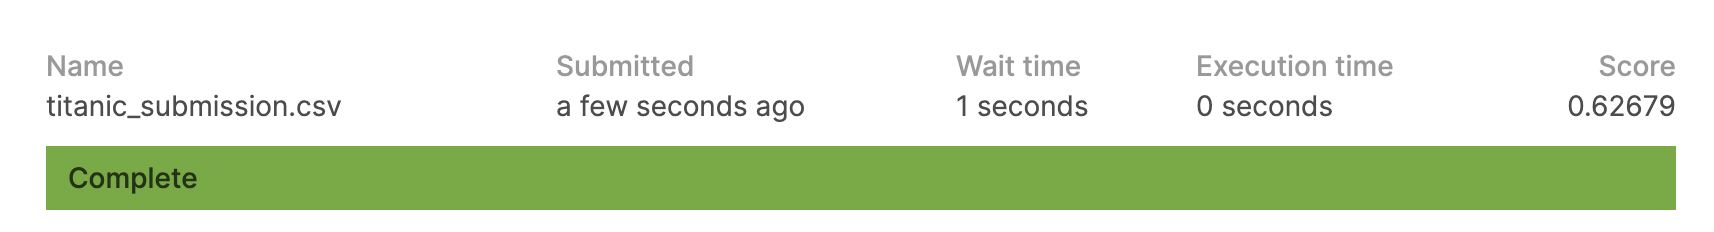









**Attempt 2:** 

Features used: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'

-Removed entries with null values from training set for a total of 712 entries,

-SVMWithSGD params: iterations=5000, all others=default

-Iterations seem to produce widely varying results - 200 significantly outperformed 50k, and 5000 outperformed both.  

Result:

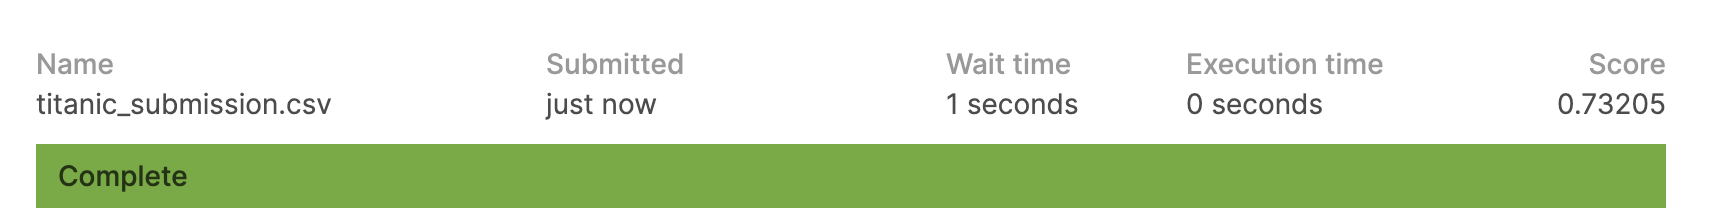



**Attempt 3:**

Features used: 'Pclass', 'Sex', 'Fare'

-Removed entries with null values from training set for a total of 891 entries (no nulls in these categories),

-SVMWithSGD params: iterations=1000000, all others=default

Result:
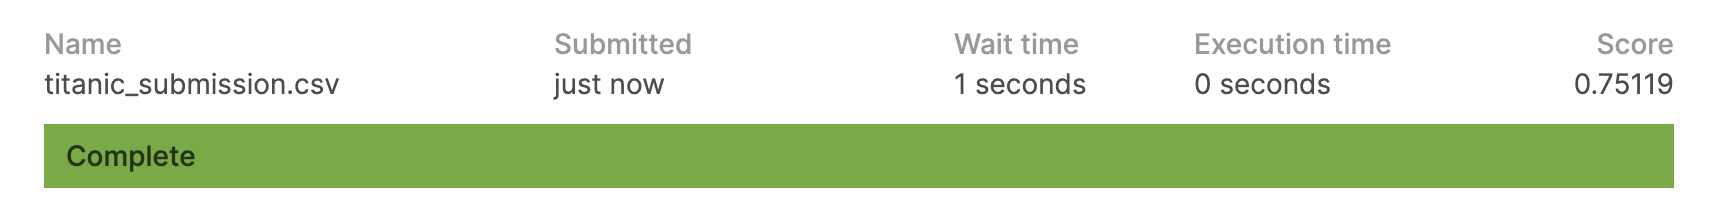

**Attempt 4:**

-Added Parch and Age back in because they are the next most relevant

Features used: 'Pclass', 'Sex', 'Age', 'Parch', 'Fare',  

-Removed entries with null values from training set for a total of 712 entries

-SVMWithSGD params: iterations=1000000, all others=default

Result:

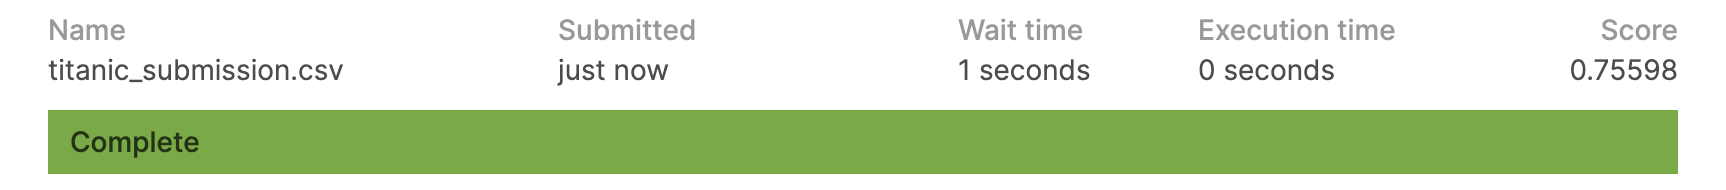

**Attempt 5:**

-Rerunning Attempt 2 with 1 million iterations to make sure a model is more firmly being converged upon.

-Removed entries with null values from training set for a total of 712 entries,

-SVMWithSGD params: iterations=1000000, all others=default

-It looks like more features are actually better?...maybe this is just happenstance but it maybe contradicts my thought that adding ambiguous features hinders the SVM.  

-Maybe automated hyperparameter tuning could further improve results, if this can even feasibly be done with pyspark's SVMWithSGD.

Result:

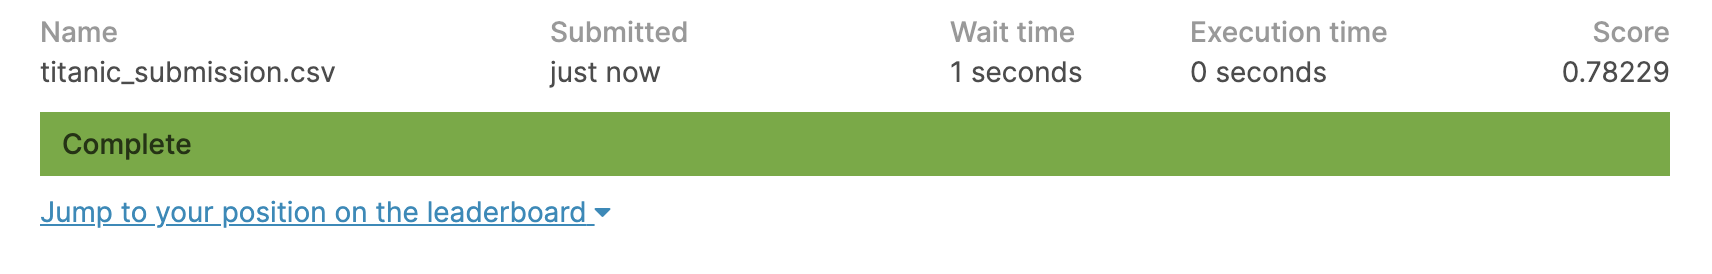